In [35]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import itertools

In [2]:
#2_glca_deprot equilibration
dir_name = "/home/oriol/Oriol/GH_A/2_glca_deprot/clas_deprot/"
top_file = dir_name + "3vo0_deprot.prmtop"
file = dir_name + "3vo0_deprot_eq.mdcrd"

In [36]:
#2_glca_deprot production
dir_name = "/home/oriol/Oriol/GH_A/2_glca_deprot/clas_deprot/"
top_file = dir_name + "3vo0_deprot.prmtop"
file = dir_name + "3vo0_deprot_prod.mdcrd"

In [48]:
dir_name = "/home/oriol/Oriol/GH_A/5_his241_deprot/"
top_file = dir_name + "3vo0_hisdeprot.prmtop"
file = dir_name + "3vo0_hisdeprot_prod.mdcrd"

In [49]:
%%time
traj = md.formats.NetCDFTrajectoryFile(file)
top = md.load_prmtop(top_file)

CPU times: user 628 ms, sys: 96 ms, total: 724 ms
Wall time: 734 ms


In [50]:
traj.n_frames

438

In [51]:
%%time
acid_base = top.select('resid 155 and sidechain and type O') #0-based index, residue 156 [E173]
c_anom = top.select('resname GUG and name C1')
H_wat = top.select('water and type H')
O_wat = top.select('water and type O')

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 173 ms


In [52]:
%%time
pair_array_H = np.array(list(itertools.product(H_wat, acid_base)))
pair_array_O = np.array(list(itertools.product(O_wat, c_anom)))

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 26.2 ms


In [53]:
traj.tell()

0

In [54]:
%%time
traj.seek(0, whence=0)
O_cutoff = 0.35
H_cutoff = 0.25
close_wat = []
dist_H = np.empty((0,pair_array_H.shape[0]))
dist_O = np.empty((0,pair_array_O.shape[0]))
for i in range(traj.n_frames):
    frame = traj.read_as_traj(top,n_frames=1)
    dist_H = md.compute_distances(frame, pair_array_H)[0]
    dist_O = md.compute_distances(frame, pair_array_O)[0]
    count = 0
    for j in range(dist_O.shape[0]):
        if dist_O[j]>O_cutoff:
            continue
        for k in range(4):
            if dist_H[4*j+k]<H_cutoff:
                count+=1
                break
    close_wat.append([i,count])
close_waters=np.asarray(close_wat)

CPU times: user 9.07 s, sys: 8 ms, total: 9.08 s
Wall time: 9.07 s


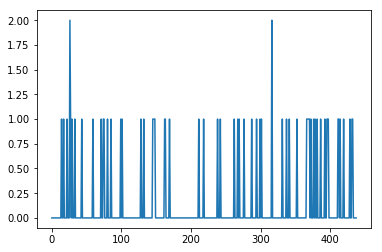

In [55]:
plt.plot(close_waters[:,0],close_waters[:,1])

In [44]:
%%time
traj.seek(0, whence=0)
dist_H = []
dist_O = []
for i in range(traj.n_frames):
    frame = traj.read_as_traj(top,n_frames=1)
    dist_H.append(md.compute_distances(frame, pair_array_H)[0].tolist())
    dist_O.append(md.compute_distances(frame, pair_array_O)[0].tolist())

KeyboardInterrupt: 

In [45]:
%%time
O_cutoff = 0.5
H_cutoff = 0.4
close_wat = np.empty((0,2))
for i in range(dist_O.shape[0]):
    count = 0
    for j in range(dist_O.shape[1]):
        if dist_O[i,j]>O_cutoff:
            continue

        for k in range(4):
            if dist_H[i,4*j+k]<H_cutoff:
                count+=1
                break
    close_wat=np.append(close_wat,np.array([[i,count]]), axis=0)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
%%time
dist_H = np.empty((0,pair_array_H.shape[0]))
dist_O = np.empty((0,pair_array_O.shape[0]))
for i in range(traj.n_frames):
    frame = traj.read_as_traj(top,n_frames=1)
    dist_H = np.append(dist_H,md.compute_distances(frame, pair_array_H), axis=0)
    dist_O = np.append(dist_O,md.compute_distances(frame, pair_array_O), axis=0)